In [27]:
#JUST USEFUL IMPORTS
import csv
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from tensorflow.keras import layers, models, optimizers
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\G512\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\G512\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\G512\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [40]:
#Functions in order to obatin the information from the files
#Methods that filters the data and eliminates some information that it is not needed to classify the texts
def clean_data(X):
    documents = []
    stemmer = WordNetLemmatizer()
    for sen in range(0, len(X)):
        # remove all links
        document = re.sub(r'[^ ]*http[^ ]*', ' ', str(X[sen]))
        # remove all links
        document = re.sub(r'[^ ]*www[^ ]*', ' ', document)
        # Remove all the special characters
        document = re.sub(r'\W', ' ', document)
        # remove all single characters
        document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
        # Remove single characters from the start
        document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
        # Substituting multiple spaces with single space
        document = re.sub(r'\s+', ' ', document, flags=re.I)
        # Converting to Lowercase
        document = document.lower()
        # Lemmatization
        document = document.split()
        lst_stopwords = nltk.corpus.stopwords.words("english")
        document = [word for word in document if word not in lst_stopwords]
        document = [stemmer.lemmatize(word) for word in document]
        document = ' '.join(document)
        documents.append(document)
    return documents
#Method that opens and reads the csv file
#It creates the datasets following the structure mentioned in the steps of the assignment (1. Data partitioning)
def openfile (primary,secondary):
    csvfile=open(primary,encoding='UTF-8')
    csvreader = csv.reader(csvfile) 
    next(csvreader)
    X = []
    Y = []
    for val in csvreader:
        X.append(val[:(len(val)-1)])
        Y.append([0 if val[(len(val)-1)] == 'False' else 1])
    X=clean_data(X)
    dfX=pd.DataFrame(X)
    dfX=dfX.rename(columns={ dfX.columns[0]: "text" })
    dfY=pd.DataFrame(Y)
    dfY=dfY.rename(columns={ dfY.columns[0]: "label" })
    X_train, X_test1, y_train, y_test1=train_test_split(dfX,dfY,test_size = 0.3,random_state=42)
    csvfile=open(secondary,encoding='UTF-8')
    csvreader = csv.reader(csvfile)
    next(csvreader)
    X = []
    Y = []
    for val in csvreader:
        X.append(val[:(len(val)-1)])
        Y.append([0 if val[(len(val)-1)] == 'False' else 1])
    X=clean_data(X)
    X_test2 = pd.DataFrame(X)
    X_test2=X_test2.rename(columns={ X_test2.columns[0]: "text" })
    y_test2 = pd.DataFrame(Y)
    y_test2=y_test2.rename(columns={ y_test2.columns[0]: "label" })
    return (X_train, y_train), (X_test1, y_test1), (X_test2, y_test2)
    

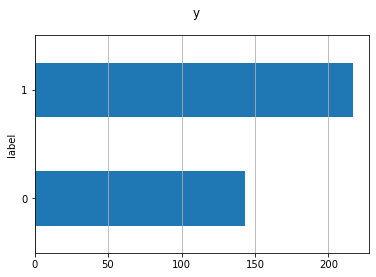

Accuracy Naive Bayes PRIMARY Dataset using text: 0.7944444444444444
Accuracy Naive Bayes SECONDARY Dataset using text: 0.6998769987699877
Accuracy test XGBClassifier PRIMARY Dataset using text: 0.925
Accuracy test XGBClassifier SECONDARY Dataset using text: 0.8437884378843789

Accuracy XGBClassifier PRIMARY Datatset using tf vectors: 0.9194444444444444
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       143
           1       0.96      0.91      0.93       217

    accuracy                           0.92       360
   macro avg       0.91      0.92      0.92       360
weighted avg       0.92      0.92      0.92       360

[[134   9]
 [ 20 197]]
Accuracy XGBClassifier SECONDARY Datatset using tf vectors: 0.8536285362853628

              precision    recall  f1-score   support

           0       0.82      0.81      0.82       325
           1       0.87      0.88      0.88       488

    accuracy                           0.85       8

In [41]:
#Code for the part 2. Baseline model training and 3. Model evaluation 1, that reads the file and predicts the labels for the vaccination topic using
#a naive bayes classifier and a XGBClassifier. The results are shown in many different ways and for both testing datasets
#This code was made following the steps of scikit-learn documentation. However, the baseline model in this case is the last part,
#where the model is trained with the tf vectors.
#I AM GONE DO THE WHOLE CODE WITH THE TWITTER AND NYT TOPIC DATASETS WITH VACCINATION LABEL (you can change it to masking_and_distancing if you want)
(X_train, y_train), (X_test1, y_test1), (X_test2, y_test2) = openfile("twitter_topic_vaccination.csv","nyt_topic_vaccination.csv")
fig, ax = plt.subplots()
fig.suptitle("y", fontsize=12)
y_test1.reset_index().groupby("label").count().sort_values(by= "index").plot(kind="barh", legend=False, ax=ax).grid(axis='x')
plt.show()
text_clf = Pipeline([('tfidf', TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}')),('clf', MultinomialNB()),])
text_clf.fit((X_train.text),(y_train.label))
predicted = text_clf.predict(X_test1.text)
print("Accuracy Naive Bayes PRIMARY Dataset using text: " + str(np.mean(predicted == np.squeeze(y_test1.label))))
predicted = text_clf.predict(X_test2.text)
print("Accuracy Naive Bayes SECONDARY Dataset using text: " + str(np.mean(predicted == np.squeeze(y_test2.label))))
text_clf = Pipeline([('tfidf', TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}')), ('clf', XGBClassifier(eval_metric='error',use_label_encoder=False)),])
text_clf.fit(X_train.text, y_train.label)
predicted = text_clf.predict(X_test1.text)
print("Accuracy test XGBClassifier PRIMARY Dataset using text: " + str(np.mean(np.squeeze(predicted) == np.squeeze(y_test1.label))))
predicted = text_clf.predict(X_test2.text)
print("Accuracy test XGBClassifier SECONDARY Dataset using text: " + str(np.mean(np.squeeze(predicted) == np.squeeze(y_test2.label))))
print()
tfidf_vect = TfidfVectorizer(use_idf=False, analyzer='word')
tfidf_vect.fit(X_train.text)
X_train_tf =  tfidf_vect.transform(X_train.text)
X_test1_tf =  tfidf_vect.transform(X_test1.text)
X_test2_tf =  tfidf_vect.transform(X_test2.text)

model= XGBClassifier(eval_metric='error',use_label_encoder=False)
model.fit(X_train_tf, y_train.label)
predictionsPrimaryBaseline = model.predict(X_test1_tf)
print("Accuracy XGBClassifier PRIMARY Datatset using tf vectors: " + str(np.mean(predictionsPrimaryBaseline == np.squeeze(y_test1.label))))
print(metrics.classification_report(y_test1.label, predictionsPrimaryBaseline))
print(metrics.confusion_matrix(y_test1.label, predictionsPrimaryBaseline))
predictionsSecondaryBaseline = model.predict(X_test2_tf)
print("Accuracy XGBClassifier SECONDARY Datatset using tf vectors: " + str(np.mean(predictionsSecondaryBaseline == np.squeeze(y_test2.label))))
print()
print(metrics.classification_report(y_test2.label, predictionsSecondaryBaseline))
print(metrics.confusion_matrix(y_test2.label, predictionsSecondaryBaseline))

In [42]:
#Code for the part 4. Feature engineering and 5. Model evaluation 2, in which the feature engineering is apllied. For this,
#I studied the "n" most common words throughout the texts for each label in order to find the words that caracterize the topic,
#then I got the stemms to use it as a check list.
def getList(dataset,labels,n):
    X_train_label=dataset.text[labels.label==1]
    lst_tokens1 = nltk.tokenize.word_tokenize(X_train_label.str.cat(sep=" "))
    dic_words_freq1 = nltk.FreqDist(lst_tokens1)
    dtf_uni1 = pd.DataFrame(dic_words_freq1.most_common(), columns=["Word","Freq"]).head(n)
    X_train_label=X_train.text[y_train.label==0]
    lst_tokens0 = nltk.tokenize.word_tokenize(X_train_label.str.cat(sep=" "))
    dic_words_freq0 = nltk.FreqDist(lst_tokens0)
    dtf_uni0 = pd.DataFrame(dic_words_freq0.most_common(), columns=["Word","Freq"]).head(n)
    i=0
    for condition in dtf_uni1.Word.isin(dtf_uni0.head(20).Word):
        if(condition):
            del(dtf_uni1.Word[i])
        i=i+1
    ps = nltk.stem.porter.PorterStemmer()
    mylist = list(set([ps.stem(word) for word in dtf_uni1.Word.values]))
    return mylist

def feature_function(text):
    new_feature_array = []
    feature=0
    words=mylist
    for word in text.split():
            for topic in words:
                if(feature==0):
                    feature = int (bool(topic in word))
    new_feature_array.append(feature)
    new_feature_array = np.squeeze(np.array(new_feature_array))
    return new_feature_array
#n is the number of words that I want to check, sometimes it will have a better performance with less words than with a lot 
#of words(vaccination topic better with 5 words, whereas masking and distancing better with 10 words)
n=7
mylist=getList(X_train,y_train,n)
print("These are the stems used for feature engineering: "+ str(mylist))
new_feature_array = X_train.text.apply(feature_function)
X_train_final = np.insert(X_train_tf.todense(), X_train_tf.shape[1], new_feature_array, axis=1)
model= XGBClassifier(eval_metric='error',use_label_encoder=False)
model.fit(X_train_final, y_train.label)
new_feature_array = X_test1.text.apply(feature_function)
X_test1_final = np.insert(X_test1_tf.todense(), X_test1_tf.shape[1], new_feature_array, axis=1)
predictionsPrimaryFeature = model.predict(X_test1_final)
print("Accuracy XGBClassifier PRIMARY Datatset without feature engineering: " + str(np.mean(predictionsPrimaryBaseline == np.squeeze(y_test1.label))))
print(metrics.classification_report(y_test1.label, predictionsPrimaryBaseline))
print(metrics.confusion_matrix(y_test1.label, predictionsPrimaryBaseline))
print("Accuracy XGBClassifier PRIMARY Datatset with feature engineering: " + str(np.mean(predictionsPrimaryFeature == np.squeeze(y_test1.label))))
print(metrics.classification_report(y_test1.label, predictionsPrimaryFeature))
print(metrics.confusion_matrix(y_test1.label, predictionsPrimaryFeature))
print()
new_feature_array = X_test2.text.apply(feature_function)
X_test2_final = np.insert(X_test2_tf.todense(), X_test2_tf.shape[1], new_feature_array, axis=1)
predictionsSecondaryFeature = model.predict(X_test2_final)
print("Accuracy XGBClassifier SECONDARY Datatset without feature engineering: " + str(np.mean(predictionsSecondaryBaseline== np.squeeze(y_test2.label))))
print(metrics.classification_report(y_test2.label, predictionsSecondaryBaseline))
print(metrics.confusion_matrix(y_test2.label, predictionsSecondaryBaseline))
print("Accuracy XGBClassifier SECONDARY Datatset with feature engineering: " + str(np.mean(predictionsSecondaryFeature == np.squeeze(y_test2.label))))
print(metrics.classification_report(y_test2.label, predictionsSecondaryFeature))
print(metrics.confusion_matrix(y_test2.label, predictionsSecondaryFeature))
print()
    

These are the stems used for feature engineering: ['vaccin', 'covidvaccin']
Accuracy XGBClassifier PRIMARY Datatset without feature engineering: 0.9194444444444444
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       143
           1       0.96      0.91      0.93       217

    accuracy                           0.92       360
   macro avg       0.91      0.92      0.92       360
weighted avg       0.92      0.92      0.92       360

[[134   9]
 [ 20 197]]
Accuracy XGBClassifier PRIMARY Datatset with feature engineering: 0.9305555555555556
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       143
           1       0.96      0.92      0.94       217

    accuracy                           0.93       360
   macro avg       0.92      0.93      0.93       360
weighted avg       0.93      0.93      0.93       360

[[135   8]
 [ 17 200]]

Accuracy XGBClassifier SECONDARY Datatset without 

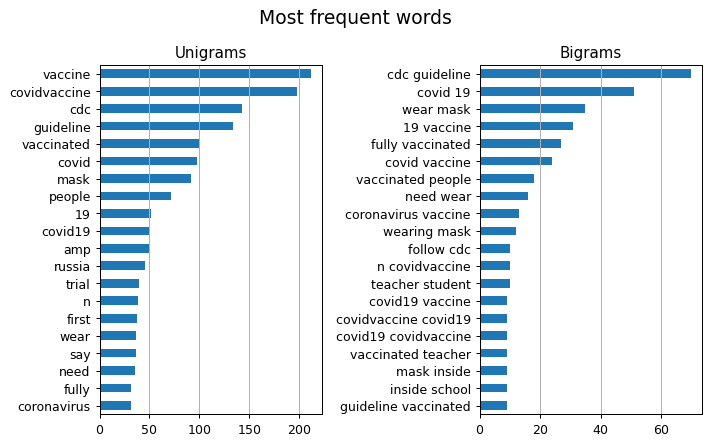

In [43]:
#FROM HERE IT IS JUST EXTRA INFROMATION THAT I USED TO COME UP WITH THIS CODE
    
fig, ax = plt.subplots(figsize=(8, 5), dpi=90, nrows=1, ncols=2)

fig.suptitle("Most frequent words", fontsize=15)
X_train_label=X_train.text[y_train.label==1]
lst_tokens = nltk.tokenize.word_tokenize(X_train_label.str.cat(sep=" "))
dic_words_freq = nltk.FreqDist(lst_tokens)
dtf_uni = pd.DataFrame(dic_words_freq.most_common(), columns=["Word","Freq"])
dic_words_freq = nltk.FreqDist(nltk.ngrams(lst_tokens, 2))
dtf_bi = pd.DataFrame(dic_words_freq.most_common(), columns=["Word","Freq"])

dtf_uni.set_index("Word").iloc[:20,:].sort_values(by="Freq").plot(kind="barh", title="Unigrams", ax=ax[0], legend=False).grid(axis='x')
ax[0].set(ylabel=None)
    
dtf_bi["Word"] = dtf_bi["Word"].apply(lambda x: " ".join(string for string in x) )
dtf_bi.set_index("Word").iloc[:20,:].sort_values(by="Freq").plot(kind="barh", title="Bigrams", ax=ax[1],legend=False).grid(axis='x')
ax[1].set(ylabel=None)
fig.tight_layout()
plt.show()


In [32]:
#SEVERAL OTHER MODELS TO USE

count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(X_train.text)
xtrain_count =  count_vect.transform(X_train.text)
xvalid_count =  count_vect.transform(X_test2.text)

tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(X_train.text)
xtrain_tfidf =  tfidf_vect.transform(X_train.text)
xvalid_tfidf =  tfidf_vect.transform(X_test2.text)

tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(X_train.text)
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(X_train.text)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(X_test2.text)

tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(X_train.text)
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_train.text)
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_test2.text) 
def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(predictions, y_test2.label)


# Naive Bayes on Count Vectors
accuracy = train_model(MultinomialNB(), xtrain_count, y_train.label, xvalid_count)
print("NB, Count Vectors: ", accuracy)

# Naive Bayes on Word Level TF IDF Vectors
accuracy = train_model(MultinomialNB(), xtrain_tfidf, y_train.label, xvalid_tfidf)
print("NB, WordLevel TF-IDF: ", accuracy)

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy = train_model(MultinomialNB(), xtrain_tfidf_ngram, y_train.label, xvalid_tfidf_ngram)
print("NB, N-Gram Vectors: ", accuracy)

# Naive Bayes on Character Level TF IDF Vectors
accuracy = train_model(MultinomialNB(), xtrain_tfidf_ngram_chars, y_train.label, xvalid_tfidf_ngram_chars)
print("NB, CharLevel Vectors: ", accuracy)
print()
# Linear Classifier on Count Vectors
accuracy = train_model(LogisticRegression(), xtrain_count, y_train.label, xvalid_count)
print ("LR, Count Vectors: ", accuracy)

# Linear Classifier on Word Level TF IDF Vectors
accuracy = train_model(LogisticRegression(), xtrain_tfidf, y_train.label, xvalid_tfidf)
print ("LR, WordLevel TF-IDF: ", accuracy)

# Linear Classifier on Ngram Level TF IDF Vectors
accuracy = train_model(LogisticRegression(), xtrain_tfidf_ngram, y_train.label, xvalid_tfidf_ngram)
print ("LR, N-Gram Vectors: ", accuracy)

# Linear Classifier on Character Level TF IDF Vectors
accuracy = train_model(LogisticRegression(), xtrain_tfidf_ngram_chars, y_train.label, xvalid_tfidf_ngram_chars)
print ("LR, CharLevel Vectors: ", accuracy)
print()
# SVM on Ngram Level TF IDF Vectors
accuracy = train_model(SVC(), xtrain_tfidf_ngram,  y_train.label, xvalid_tfidf_ngram)
print("SVM, N-Gram Vectors: ", accuracy)
print()
# RF on Count Vectors
accuracy = train_model(RandomForestClassifier(), xtrain_count, y_train.label, xvalid_count)
print ("RF, Count Vectors: ", accuracy)

# RF on Word Level TF IDF Vectors
accuracy = train_model(RandomForestClassifier(), xtrain_tfidf, y_train.label, xvalid_tfidf)
print ("RF, WordLevel TF-IDF: ", accuracy)

# RF on Ngram Level TF IDF Vectors
accuracy = train_model(RandomForestClassifier(), xtrain_tfidf_ngram, y_train.label, xvalid_tfidf_ngram)
print("RF, N-Gram Vectors: ", accuracy)

# RF on Character Level TF IDF Vectors
accuracy = train_model(RandomForestClassifier(), xtrain_tfidf_ngram_chars, y_train.label, xvalid_tfidf_ngram_chars)
print("RF, CharLevel Vectors: ", accuracy)
print()

# Extereme Gradient Boosting on Count Vectors
accuracy = train_model(XGBClassifier(eval_metric='error',use_label_encoder=False), xtrain_count.tocsc(), y_train.label, xvalid_count.tocsc())
print ("Xgb, Count Vectors: ", accuracy)

# Extereme Gradient Boosting on Word Level TF IDF Vectors
accuracy = train_model(XGBClassifier(eval_metric='error',use_label_encoder=False), xtrain_tfidf.tocsc(), y_train.label, xvalid_tfidf.tocsc())
print ("Xgb, WordLevel TF-IDF: ", accuracy)

# Extereme Gradient Boosting on Character Level TF IDF Vectors
accuracy = train_model(XGBClassifier(eval_metric='error',use_label_encoder=False), xtrain_tfidf_ngram_chars.tocsc(), y_train.label, xvalid_tfidf_ngram_chars.tocsc())
print ("Xgb, CharLevel Vectors: ", accuracy)
print()

def create_model_architecture(input_size):
    # create input layer 
    input_layer = layers.Input((input_size, ), sparse=True)
    
    # create hidden layer
    hidden_layer = layers.Dense(100, activation="sigmoid")(input_layer)
    
    # create output layer
    output_layer = layers.Dense(1, activation="sigmoid")(hidden_layer)

    classifier = models.Model(inputs = input_layer, outputs = output_layer)
    classifier.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy')
    return classifier 
classifier = create_model_architecture(xtrain_tfidf.shape[1])
accuracy = train_model(classifier, xtrain_tfidf.toarray(), y_train.label, xvalid_tfidf, is_neural_net=True)
print ("NN, Ngram Level TF IDF Vectors",  accuracy)

NB, Count Vectors:  0.7638376383763837
NB, WordLevel TF-IDF:  0.7035670356703567
NB, N-Gram Vectors:  0.6113161131611317
NB, CharLevel Vectors:  0.7662976629766297

LR, Count Vectors:  0.8400984009840098
LR, WordLevel TF-IDF:  0.7921279212792128
LR, N-Gram Vectors:  0.6076260762607626
LR, CharLevel Vectors:  0.8942189421894219

SVM, N-Gram Vectors:  0.6100861008610086

RF, Count Vectors:  0.7355473554735548
RF, WordLevel TF-IDF:  0.8167281672816729
RF, N-Gram Vectors:  0.5916359163591636
RF, CharLevel Vectors:  0.9446494464944649

Xgb, Count Vectors:  0.8720787207872078
Xgb, WordLevel TF-IDF:  0.8462484624846248
Xgb, CharLevel Vectors:  0.9102091020910209

27/27 [==============================] - 0s 1ms/step - loss: 0.6815
NN, Ngram Level TF IDF Vectors 0.3997539975399754


0.3
